In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.1


In [4]:
tf.random.set_seed(12)

In [5]:
train_data_dir= "D:\Data_set\Chest-xray2\COVID-19 Radiography Database\Xray_train_data"

In [6]:
# Used Sequential
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(.1, input_shape=(32,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [18]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0025),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [8]:
# Directing Images to train folder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height, img_width=128,128
batch_size=16

#Augmentation of image data
train_datagen = ImageDataGenerator(rotation_range=20,
                                   zoom_range=0.15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   fill_mode="nearest",
                                   validation_split=0.3) # set validation split


#Makin the training data yo
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data
# Splitting images for validation set
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

x1=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y1=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])

x2 = np.concatenate([validation_generator.next()[0] for i in range(validation_generator.__len__())])
y2 = np.concatenate([validation_generator.next()[1] for i in range(validation_generator.__len__())])
print(x1.shape,'\n',x2.shape)

Found 1093 images belonging to 2 classes.
Found 467 images belonging to 2 classes.
(1093, 128, 128, 3) 
 (467, 128, 128, 3)


In [9]:
x = np.array(x1)
y = np.array(y1)

In [15]:
os.chdir(r"D:\Data_set\Chest-xray2\COVID-19 Radiography Database\Xray_train_data")

In [17]:
import cv2
import os
imgs = []
imgL = []
for fileName in os.listdir("NORMAL"): 
        img = cv2.imread("NORMAL/" + fileName)
        if img is not None:
            imgL.append(0)
            img = cv2.resize(img,(128,128))
            imgs.append(img)

for fileName in os.listdir("COVID-19"): 
        img = cv2.imread("COVID-19/" + fileName)
        if img is not None:
            imgL.append(1)
            img = cv2.resize(img,(128,128))
            imgs.append(img)

In [19]:
img_data = np.array(imgs)

In [20]:
img_data_test = np.array(imgL)

In [21]:
test_data = np.concatenate([y, img_data_test])

In [22]:
train_data = np.concatenate([x, img_data])

In [23]:
mapIndexPosition = list(zip(train_data, test_data))

In [25]:
import random
random.shuffle(mapIndexPosition)

In [26]:
train_data, test_data = zip(*mapIndexPosition)

In [27]:
test_data = np.array(test_data)

In [28]:
train_data = np.array(train_data)

In [29]:
type(train_data)

numpy.ndarray

In [30]:
print(train_data.shape,'\n',test_data.shape)

(2653, 128, 128, 3) 
 (2653,)


In [31]:
img_data.shape

(1560, 128, 128, 3)

In [38]:
# Training the model without augmentation
#trainer1=model.fit(train_generator,validation_data=validation_generator,epochs=10,verbose=2)
#trainer2=model.fit(train_data,test_data,validation_split = 0.01,epochs=10,verbose=2)
trainer3=model.fit(train_data,test_data,validation_data=validation_generator,epochs=10,verbose=2)

Epoch 1/10
83/83 - 15s - loss: 0.0375 - accuracy: 0.9921 - val_loss: 1.0342 - val_accuracy: 0.7559
Epoch 2/10
83/83 - 13s - loss: 0.0275 - accuracy: 0.9947 - val_loss: 0.9828 - val_accuracy: 0.7537
Epoch 3/10
83/83 - 13s - loss: 0.0222 - accuracy: 0.9951 - val_loss: 0.9620 - val_accuracy: 0.7602
Epoch 4/10
83/83 - 13s - loss: 0.0192 - accuracy: 0.9959 - val_loss: 0.9069 - val_accuracy: 0.7602
Epoch 5/10
83/83 - 13s - loss: 0.0169 - accuracy: 0.9962 - val_loss: 1.0537 - val_accuracy: 0.7666
Epoch 6/10
83/83 - 13s - loss: 0.0147 - accuracy: 0.9970 - val_loss: 1.0285 - val_accuracy: 0.7730
Epoch 7/10
83/83 - 13s - loss: 0.0136 - accuracy: 0.9970 - val_loss: 1.2639 - val_accuracy: 0.7388
Epoch 8/10
83/83 - 13s - loss: 0.0117 - accuracy: 0.9970 - val_loss: 1.0284 - val_accuracy: 0.7794
Epoch 9/10
83/83 - 13s - loss: 0.0102 - accuracy: 0.9970 - val_loss: 1.0568 - val_accuracy: 0.7559
Epoch 10/10
83/83 - 13s - loss: 0.0092 - accuracy: 0.9977 - val_loss: 1.3627 - val_accuracy: 0.7345


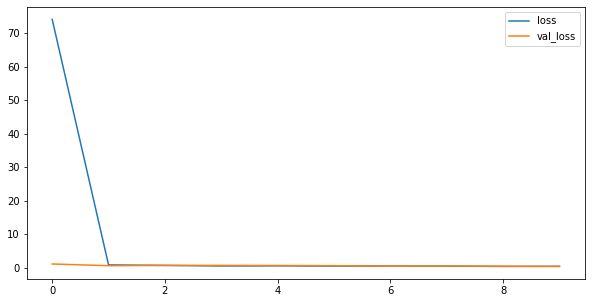

In [34]:
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(trainer1.history["loss"],label="loss")
plt.plot(trainer1.history["val_loss"],label="val_loss")
plt.legend()

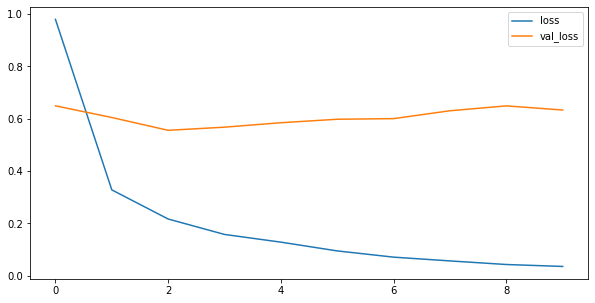

In [35]:
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(trainer2.history["loss"],label="loss")
plt.plot(trainer2.history["val_loss"],label="val_loss")
plt.legend()

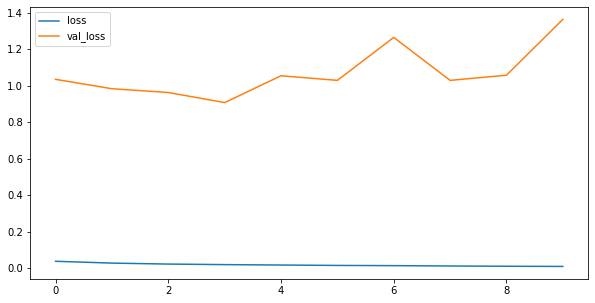

In [39]:
# Plotting train_loss vs val_loss
plt.figure(figsize=(10,5))
plt.plot(trainer3.history["loss"],label="loss")
plt.plot(trainer3.history["val_loss"],label="val_loss")
plt.legend()

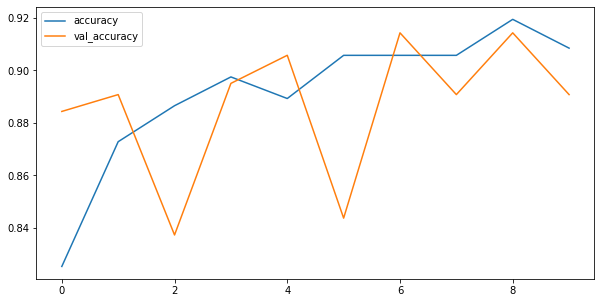

In [36]:
# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize=(10,5))
plt.plot(trainer1.history["accuracy"],label="accuracy")
plt.plot(trainer1.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

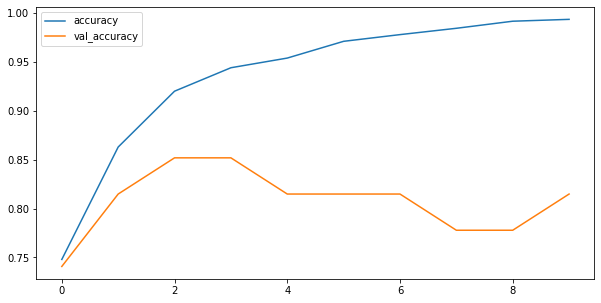

In [37]:
# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize=(10,5))
plt.plot(trainer2.history["accuracy"],label="accuracy")
plt.plot(trainer2.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

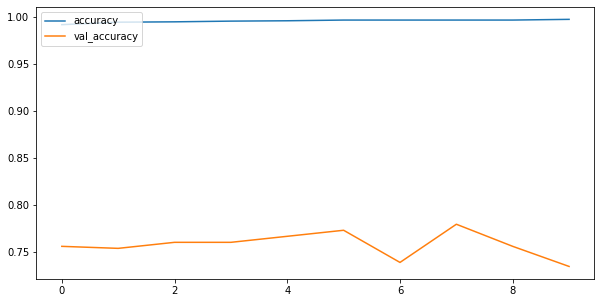

In [40]:
# Plotting train_accuracy vs Val_accuracy
plt.figure(figsize=(10,5))
plt.plot(trainer3.history["accuracy"],label="accuracy")
plt.plot(trainer3.history["val_accuracy"],label="val_accuracy")
plt.legend(loc='upper left')

In [9]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
import cv2
img = cv2.imread('train_data_dir' + '/NORMAL (1)')
plt.figure(figsize=(10, 10))
augmented_image = data_augmentation(img)
ax = plt.subplot(3, 3, i + 1)
plt.imshow(augmented_image[0])
plt.axis("off")

AttributeError: 'NoneType' object has no attribute 'shape'

<Figure size 720x720 with 0 Axes>

In [27]:
imgs

[array([[[ 22,  22,  22],
         [ 15,  15,  15],
         [ 62,  62,  62],
         ...,
         [162, 162, 162],
         [ 96,  96,  96],
         [ 95,  95,  95]],
 
        [[ 21,  21,  21],
         [ 16,  16,  16],
         [ 57,  57,  57],
         ...,
         [ 99,  99,  99],
         [ 92,  92,  92],
         [ 91,  91,  91]],
 
        [[ 21,  21,  21],
         [ 17,  17,  17],
         [ 53,  53,  53],
         ...,
         [100, 100, 100],
         [ 90,  90,  90],
         [ 89,  89,  89]],
 
        ...,
 
        [[ 29,  29,  29],
         [ 27,  27,  27],
         [ 26,  26,  26],
         ...,
         [ 20,  20,  20],
         [ 23,  23,  23],
         [ 25,  25,  25]],
 
        [[ 29,  29,  29],
         [ 26,  26,  26],
         [ 26,  26,  26],
         ...,
         [ 23,  23,  23],
         [ 24,  24,  24],
         [ 24,  24,  24]],
 
        [[ 34,  34,  34],
         [ 29,  29,  29],
         [ 30,  30,  30],
         ...,
         [ 71,  71,  71],
  

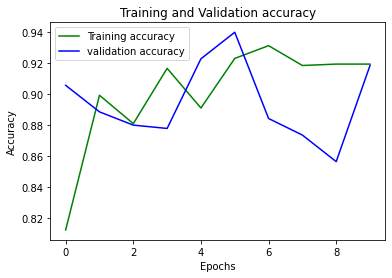

In [41]:
loss_train = trainer.history['accuracy']
loss_val = trainer.history['val_accuracy']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
print(trainer.history)

{'loss': [8.44821548461914, 2.604374408721924, 2.6593270301818848, 1.4569674730300903, 1.9362415075302124, 1.354990839958191, 0.7872345447540283, 1.0276381969451904, 1.2045481204986572, 0.7549065947532654], 'accuracy': [0.8124428391456604, 0.8993595838546753, 0.881061315536499, 0.9167429208755493, 0.8911253213882446, 0.9231473207473755, 0.9313815236091614, 0.918572723865509, 0.9194876551628113, 0.9194876551628113], 'val_loss': [2.901613712310791, 3.3244903087615967, 2.11857533454895, 4.336758613586426, 1.9307472705841064, 1.3624769449234009, 2.4444615840911865, 3.330636978149414, 1.3766326904296875, 0.756134033203125], 'val_accuracy': [0.9057815670967102, 0.8886509537696838, 0.8800856471061707, 0.8779443502426147, 0.9229121804237366, 0.9400428533554077, 0.8843683004379272, 0.8736616969108582, 0.856531023979187, 0.91862952709198]}


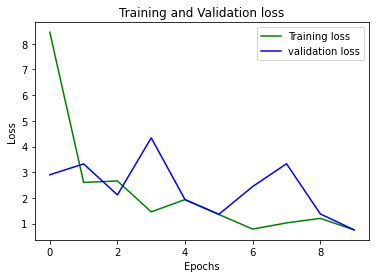

In [42]:
loss_train = trainer.history['loss']
loss_val = trainer.history['val_loss']
epochs = range(0,10)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


In [45]:
print(tf.config.experimental.list_physical_devices('XLA_GPU'))

[PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


In [48]:
print(x)

[[[[  8.          8.          8.       ]
   [  8.          8.          8.       ]
   [  8.          8.          8.       ]
   ...
   [ 51.137253   51.137253   51.137253 ]
   [ 55.901844   55.901844   55.901844 ]
   [ 60.66644    60.66644    60.66644  ]]

  [[  8.          8.          8.       ]
   [  8.          8.          8.       ]
   [  8.          8.          8.       ]
   ...
   [ 78.879326   78.879326   78.879326 ]
   [ 81.82217    81.82217    81.82217  ]
   [ 84.765      84.765      84.765    ]]

  [[  8.          8.          8.       ]
   [  8.          8.          8.       ]
   [  8.          8.          8.       ]
   ...
   [ 87.7965     87.7965     87.7965   ]
   [ 86.67542    86.67542    86.67542  ]
   [ 85.554344   85.554344   85.554344 ]]

  ...

  [[  0.          0.          0.       ]
   [  0.          0.          0.       ]
   [  0.          0.          0.       ]
   ...
   [141.99      141.99      141.99     ]
   [120.07113   120.07113   120.07113  ]
   [123.37865   

In [110]:
import random

random.shuffle(train_data,1)
random.shuffle(test_data,1)

TypeError: 'int' object is not callable

for i in range(467):


In [83]:
imgdata = np.array()
for i in range(467):
    imgdata.append() = train_data[i] 

SyntaxError: can't assign to function call (<ipython-input-83-0761985a6622>, line 3)

In [104]:
print(train_data.shape,test_data.shape)

(2653, 128, 128, 3) (2653,)


In [108]:
print(train_data)

[[[[166.32433  166.32433  166.32433 ]
   [162.89401  162.89401  162.89401 ]
   [159.83794  159.83794  159.83794 ]
   ...
   [ 29.015877  29.015877  29.015877]
   [ 28.373005  28.373005  28.373005]
   [ 27.666628  27.666628  27.666628]]

  [[160.94374  160.94374  160.94374 ]
   [162.01053  162.01053  162.01053 ]
   [160.18475  160.18475  160.18475 ]
   ...
   [ 24.568336  24.568336  24.568336]
   [ 23.944784  23.944784  23.944784]
   [ 23.662233  23.662233  23.662233]]

  [[163.82298  163.82298  163.82298 ]
   [165.75163  165.75163  165.75163 ]
   [163.81755  163.81755  163.81755 ]
   ...
   [ 22.422916  22.422916  22.422916]
   [ 22.140366  22.140366  22.140366]
   [ 22.28437   22.28437   22.28437 ]]

  ...

  [[174.73051  174.73051  174.73051 ]
   [186.49826  186.49826  186.49826 ]
   [196.63098  196.63098  196.63098 ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[173.40222  173.40222  173.40222 ]
   [184

In [109]:
print(test_data)

[1. 0. 0. ... 0. 1. 0.]
